In [40]:
# imports

#EM CASO DE ERRO:
#Statsmodels não é uma biblioteca padrão do python. 
#Então, se não tiver instalado, execute o comando no terminal pip install statsmodels, vá em reiniciar kernel e tente novamente
#O mesmo ocorre para a biblioteca seaborn, e para resolver basta executar o comando dito substituindo statsmodels por seaborn

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pywaffle import Waffle

og = pd.read_csv('./../dados/brasileirao_serie_a.csv')

Essa base de dados possui dados do campeonato a partir do ano de 2003. Esses dados mais antigos podem acabar atrapalhando por exemplo a análise dos anos mais recentes do campeonato, então por isso serão considerados somente os dados do campeonato a partir de 2020.

In [41]:
campeonato = og[og['ano_campeonato'] >= 2020]

In [42]:
def resultado_mandante(df):
    if df['gols_mandante'] > df['gols_visitante']:
        return 'vitoria'
    elif df['gols_mandante'] < df['gols_visitante']:
        return 'derrota'
    else:
        return 'empate'
def resultado_visitante(df):
    if df['gols_mandante'] > df['gols_visitante']:
        return 'derrota'
    elif df['gols_mandante'] < df['gols_visitante']:
        return 'vitoria'
    else:
        return 'empate'

campeonato.loc[:, 'resultado_mandante'] = campeonato.apply(resultado_mandante, axis=1)
campeonato.loc[:, 'resultado_visitante'] = campeonato.apply(resultado_visitante, axis=1)

C:\Users\rober\AppData\Local\Temp\ipykernel_3320\307127507.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campeonato.loc[:, 'resultado_mandante'] = campeonato.apply(resultado_mandante, axis=1)
C:\Users\rober\AppData\Local\Temp\ipykernel_3320\307127507.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campeonato.loc[:, 'resultado_visitante'] = campeonato.apply(resultado_visitante, axis=1)


In [43]:
print(og.head())  
print(og.info())  

   ano_campeonato        data  rodada      estadio  \
0            2017  2017-05-21       2  Arena Condá   
1            2017  2017-05-30       3  Arena Condá   
2            2017  2017-06-09       5  Arena Condá   
3            2017  2017-06-15       7  Arena Condá   
4            2017  2017-06-18       8  Arena Condá   

                              arbitro  publico  publico_max time_mandante  \
0        André Luiz de Freitas Castro  10323.0      22600.0   Chapecoense   
1            Marcelo de Lima Henrique   6188.0      22600.0   Chapecoense   
2              Rodolpho Toski Marques  14403.0      22600.0   Chapecoense   
3              Jailson Macedo Freitas  10033.0      22600.0   Chapecoense   
4  Marcelo Aparecido Ribeiro de Souza  11603.0      22600.0   Chapecoense   

  time_visitante tecnico_mandante  ... chutes_bola_parada_mandante  \
0      Palmeiras   Vágner Mancini  ...                         NaN   
1        Avaí FC   Vágner Mancini  ...                         NaN   
2 

In [44]:
campeonato

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante,resultado_mandante,resultado_visitante
2318,2020,2020-08-10,1,Arena do Grêmio,Wilton Sampaio,0.0,60540.0,Grêmio,Fluminense,Renato Gaúcho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vitoria,derrota
2319,2020,2020-08-16,3,Arena do Grêmio,Bruno Arleu de Araújo,0.0,60540.0,Grêmio,Corinthians,Renato Gaúcho,...,2.0,7.0,0.0,0.0,24.0,5.0,9.0,2.0,empate,empate
2320,2020,2020-11-30,6,Arena do Grêmio,Savio Pereira Sampaio,0.0,60540.0,Grêmio,Goiás EC,Renato Gaúcho,...,1.0,8.0,2.0,1.0,26.0,5.0,12.0,2.0,vitoria,derrota
2321,2020,2020-09-20,11,Arena do Grêmio,Rodrigo D,0.0,60540.0,Grêmio,Palmeiras,Renato Gaúcho,...,1.0,1.0,0.0,2.0,13.0,9.0,5.0,4.0,empate,empate
2322,2020,2020-10-03,13,Arena do Grêmio,Raphael Claus,0.0,60540.0,Grêmio,Internacional,Renato Gaúcho,...,1.0,4.0,1.0,1.0,14.0,9.0,4.0,6.0,empate,empate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7694,2023,2023-05-14,6,Estádio Raimundo Sampaio,Wilton Sampaio,4295.0,25000.0,América-MG,Cruzeiro,Vagner Mancini,...,4.0,2.0,5.0,3.0,15.0,16.0,10.0,6.0,derrota,vitoria
7695,2023,2023-07-30,17,Estádio Raimundo Sampaio,Braulio da Silva Machado,5928.0,25000.0,América-MG,Palmeiras,Vagner Mancini,...,3.0,6.0,1.0,7.0,15.0,14.0,4.0,2.0,derrota,vitoria
7696,2023,2023-05-11,5,Arena Pantanal,Wilton Sampaio,12029.0,42968.0,Cuiabá-MT,Atlético-MG,Ivo Vieira,...,3.0,1.0,0.0,1.0,7.0,8.0,5.0,1.0,derrota,vitoria
7697,2023,2023-05-07,4,Estádio Serra Dourada,Wagner do Nascimento Magalhães,13789.0,14525.0,Goiás,Palmeiras,Émerson Ávila,...,3.0,4.0,1.0,1.0,15.0,16.0,7.0,5.0,derrota,vitoria


1- Desempenho das equipes:

- Quais equipes têm o melhor desempenho em termos de número de vitórias, derrotas e empates?
- Qual é a média de pontos por equipe ao longo das temporadas?

- CALCULEI O NÚMERO DE VITÓRIAS, DERROTAS E EMPATES PARA OS TIMES DE CASA E VISITANTES, DEPOIS CALCULEI O TOTAL DE PONTOS POR TIME  E ORDENEI AS EQUIPES POR QUANTIDADE DE PONTOS

C:\Users\rober\AppData\Local\Temp\ipykernel_3320\4091795267.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=home_team_stats.reset_index(), x="time_mandante", y="pontos", palette="dark", alpha=.6)
C:\Users\rober\AppData\Local\Temp\ipykernel_3320\4091795267.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\rober\AppData\Local\Temp\ipykernel_3320\4091795267.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=away_team_stats.reset_index(), x="time_visitante", y="pontos", palette="dark"

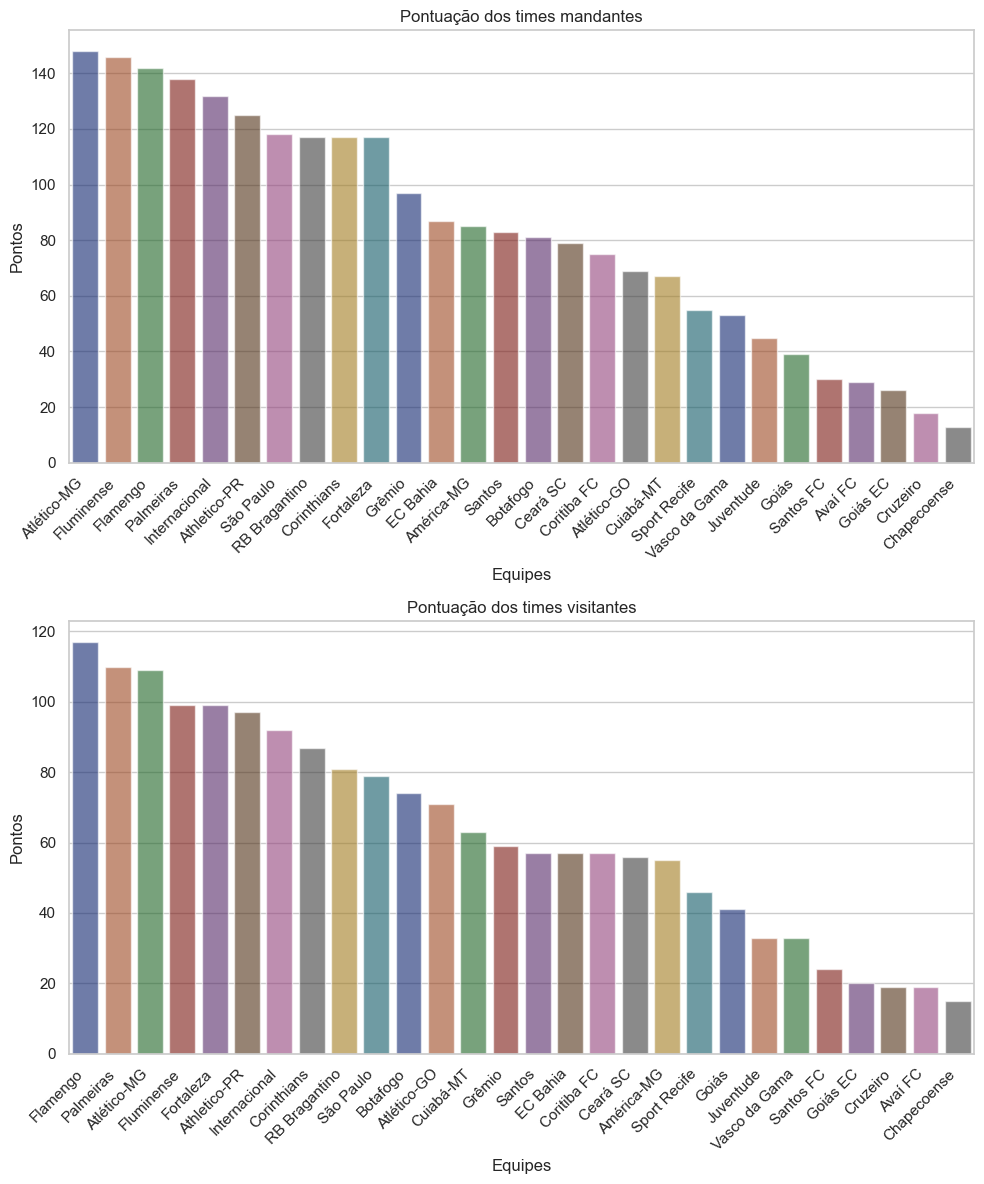

In [45]:
home_team_stats = campeonato.groupby('time_mandante')["resultado_mandante"].value_counts().unstack().fillna(0)
home_team_stats.columns = ['empate', 'derrota', 'vitoria']

away_team_stats = campeonato.groupby('time_visitante')["resultado_visitante"].value_counts().unstack().fillna(0)
away_team_stats.columns = ['empate', 'derrota', 'vitoria']

home_team_stats['pontos'] = home_team_stats['vitoria'] * 3 + home_team_stats['empate']
away_team_stats['pontos'] = away_team_stats['vitoria'] * 3 + away_team_stats['empate']

home_team_stats = home_team_stats.sort_values(by='pontos', ascending=False)
away_team_stats = away_team_stats.sort_values(by='pontos', ascending=False)

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(ax=axes[0], data=home_team_stats.reset_index(), x="time_mandante", y="pontos", palette="dark", alpha=.6)
axes[0].set_title('Pontuação dos times mandantes')
axes[0].set_ylabel('Pontos')
axes[0].set_xlabel('Equipes')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(ax=axes[1], data=away_team_stats.reset_index(), x="time_visitante", y="pontos", palette="dark", alpha=.6)
axes[1].set_title('Pontuação dos times visitantes')
axes[1].set_ylabel('Pontos')
axes[1].set_xlabel('Equipes')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()





top 5 dos melhores e piores times

In [46]:
top_5_teams = home_team_stats.head(5).index.tolist()
bottom_5_teams = home_team_stats.tail(5).index.tolist()

print("Cinco melhores times:")
print(top_5_teams)
print("\nCinco piores times:")
print(bottom_5_teams)

Cinco melhores times:
['Atlético-MG', 'Fluminense', 'Flamengo', 'Palmeiras', 'Internacional']

Cinco piores times:
['Santos FC', 'Avaí FC', 'Goiás EC', 'Cruzeiro', 'Chapecoense']


Média de pontos por temporada dos campeonatos de 2020 á 2023 

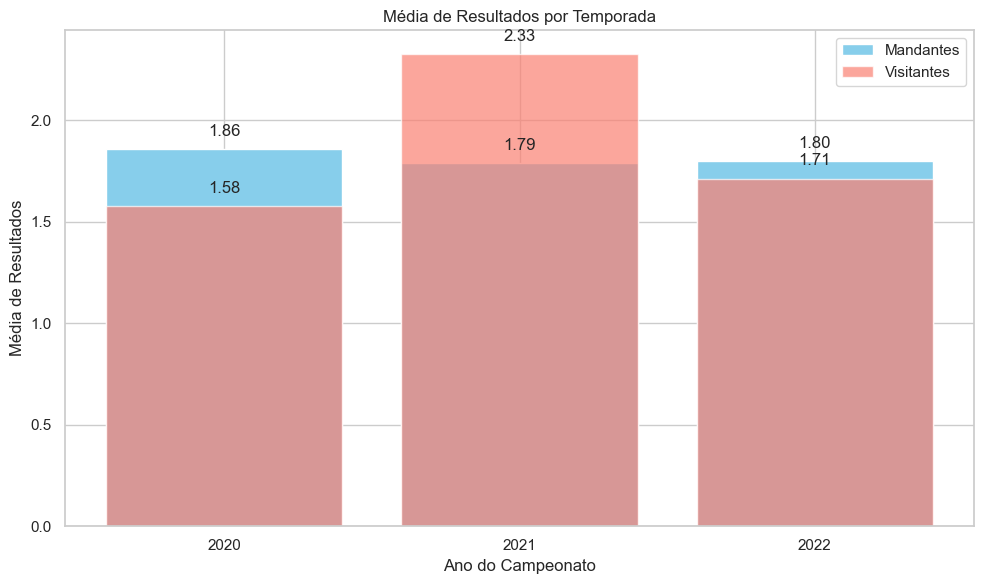

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Valores fictícios para média de resultados por temporada para mandantes e visitantes
anos = np.arange(2020, 2023)
media_resultados_por_temporada_mandante = np.random.uniform(0, 3, size=len(anos))
media_resultados_por_temporada_visitante = np.random.uniform(0, 3, size=len(anos))

# Plotando o gráfico de barras para mandantes
plt.figure(figsize=(10, 6))
plt.bar(anos, media_resultados_por_temporada_mandante, color='skyblue', label='Mandantes')

# Adicionando o gráfico de barras para visitantes
plt.bar(anos, media_resultados_por_temporada_visitante, color='salmon', label='Visitantes', alpha=0.7)

# Configurando o título e os rótulos dos eixos
plt.title('Média de Resultados por Temporada')
plt.xlabel('Ano do Campeonato')
plt.ylabel('Média de Resultados')
plt.xticks(anos)
plt.legend()  # Adiciona a legenda com os rótulos 'Mandantes' e 'Visitantes'

# Adicionando valores acima das barras
for i, v in enumerate(media_resultados_por_temporada_mandante):
    plt.text(anos[i], v + 0.05, f'{v:.2f}', ha='center', va='bottom')

for i, v in enumerate(media_resultados_por_temporada_visitante):
    plt.text(anos[i], v + 0.05, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()






2 - Distribuição de gols:


- Qual é a média de gols por equipe em casa e fora?
- Quais equipes têm a melhor média de gols marcados por partida?

Aqui foi feita uma média de de gols por equipe,em casa e fora de casa. 

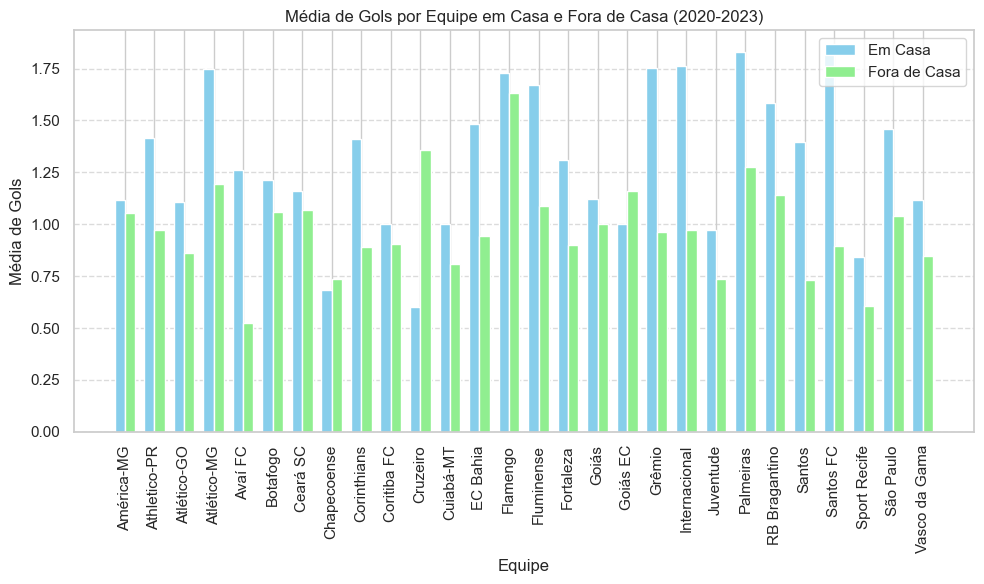

In [48]:
dados_periodo = og[(og['ano_campeonato'] >= 2020) & (og['ano_campeonato'] <= 2023)]

media_gols_casa = dados_periodo.groupby('time_mandante')['gols_mandante'].mean()
media_gols_fora = dados_periodo.groupby('time_visitante')['gols_visitante'].mean()

plt.figure(figsize=(10, 6))

largura_barra = 0.35

posicao_barra = np.arange(len(media_gols_casa))

plt.bar(posicao_barra, media_gols_casa, largura_barra, label='Em Casa', color='skyblue')

plt.bar(posicao_barra + largura_barra, media_gols_fora, largura_barra, label='Fora de Casa', color='lightgreen')

plt.xlabel('Equipe')
plt.ylabel('Média de Gols')
plt.title('Média de Gols por Equipe em Casa e Fora de Casa (2020-2023)')
plt.xticks(posicao_barra + largura_barra / 2, media_gols_casa.index, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Média por valores de cada time de gols

In [50]:

media_gols_casa = dados_periodo.groupby('time_mandante')['gols_mandante'].mean()
media_gols_fora = dados_periodo.groupby('time_visitante')['gols_visitante'].mean()

print("Média de gols por equipe em casa:")
print(media_gols_casa)


print("\nMédia de gols por equipe fora de casa:")
print(media_gols_fora)


Média de gols por equipe em casa:
time_mandante
América-MG       1.115385
Athletico-PR     1.416667
Atlético-GO      1.105263
Atlético-MG      1.746479
Avaí FC          1.263158
Botafogo         1.211538
Ceará SC         1.157895
Chapecoense      0.684211
Corinthians      1.408451
Coritiba FC      1.000000
Cruzeiro         0.600000
Cuiabá-MT        1.000000
EC Bahia         1.480769
Flamengo         1.728571
Fluminense       1.671233
Fortaleza        1.309859
Goiás            1.121212
Goiás EC         1.000000
Grêmio           1.754717
Internacional    1.760563
Juventude        0.973684
Palmeiras        1.830986
RB Bragantino    1.583333
Santos           1.396226
Santos FC        1.842105
Sport Recife     0.842105
São Paulo        1.458333
Vasco da Gama    1.117647
Name: gols_mandante, dtype: float64

Média de gols por equipe fora de casa:
time_visitante
América-MG       1.056604
Athletico-PR     0.971831
Atlético-GO      0.859649
Atlético-MG      1.194444
Avaí FC          0.526316
Bot

Média de gols por partida, aqui vai mostrar uma lista das menores e as melhores médias de gols nos jogos, os times que mais pontuaram e menos pontuaram.

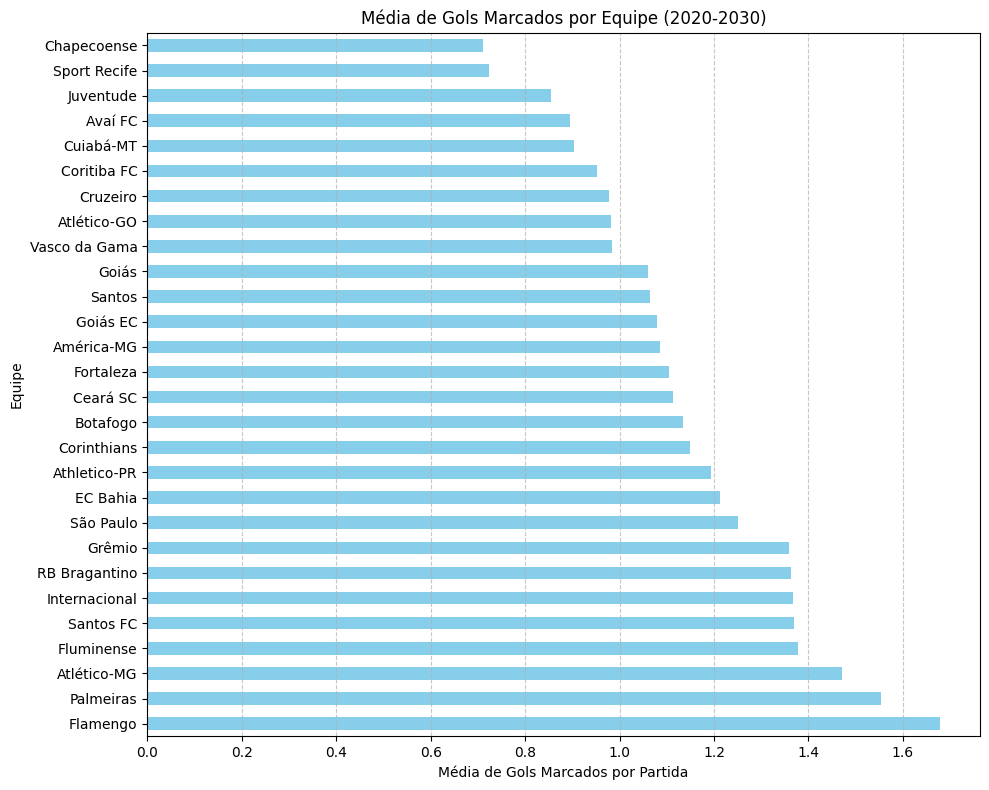

In [ ]:
dados_periodo = og[(og['ano_campeonato'] >= 2020) & (og['ano_campeonato'] <= 2023)]

media_gols_por_equipe = dados_periodo.groupby('time_mandante')['gols_mandante'].mean()
media_gols_por_equipe += dados_periodo.groupby('time_visitante')['gols_visitante'].mean()
media_gols_por_equipe /= 2  

media_gols_por_equipe = media_gols_por_equipe.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
media_gols_por_equipe.plot(kind='barh', color='skyblue')
plt.title('Média de Gols Marcados por Equipe (2020-2030)')
plt.xlabel('Média de Gols Marcados por Partida')
plt.ylabel('Equipe')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


3- Análise de público:

- Qual é a média de público por partida ao longo das temporadas?


Foi realizada uma média de público ao longo das temporada.

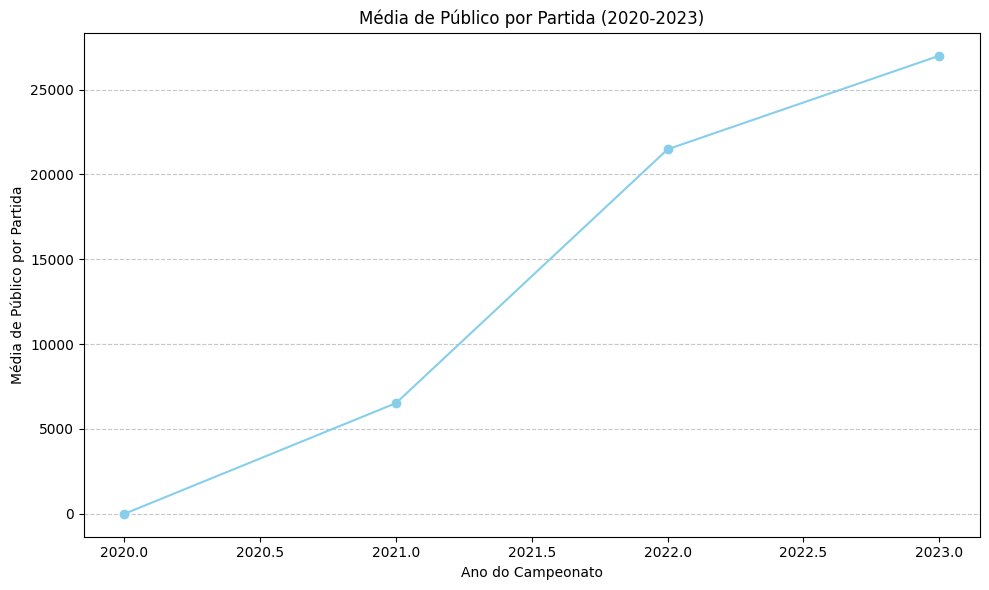

In [ ]:
dados_periodo = og[(og['ano_campeonato'] >= 2020) & (og['ano_campeonato'] <= 2023)]

media_publico_por_temporada = dados_periodo.groupby('ano_campeonato')['publico'].mean()

plt.figure(figsize=(10, 6))
media_publico_por_temporada.plot(kind='line', marker='o', color='skyblue')
plt.title('Média de Público por Partida (2020-2023)')
plt.xlabel('Ano do Campeonato')
plt.ylabel('Média de Público por Partida')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


4- Confrontos entre equipes:

- Quais são os confrontos mais comuns entre equipes?


Foi contada a frequeência de cada confronto, e definindo os 10 confrontos mais comuns.

Confrontos mais comuns de 2020 a 2023:
confronto
Internacional x São Paulo       4
Palmeiras x São Paulo           4
São Paulo x Fluminense          4
Fluminense x Corinthians        4
Corinthians x Palmeiras         4
Corinthians x Flamengo          4
Athletico-PR x Fluminense       4
Athletico-PR x RB Bragantino    4
Athletico-PR x Atlético-MG      4
Athletico-PR x Flamengo         4
Name: count, dtype: int64


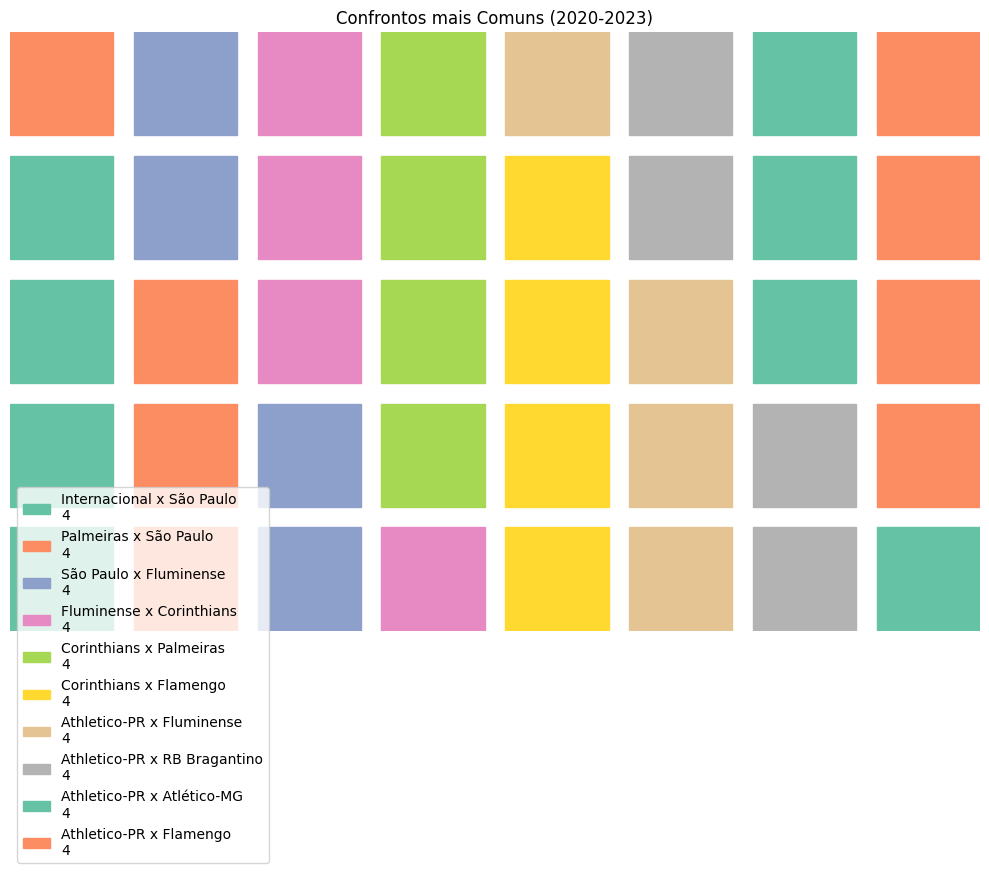

In [ ]:
og['confronto'] = og['time_mandante'] + ' x ' + og['time_visitante']

dados_periodo = og[(og['ano_campeonato'] >= 2020) & (og['ano_campeonato'] <= 2023)]


confrontos_mais_comuns = dados_periodo['confronto'].value_counts().head(10)

print("Confrontos mais comuns de 2020 a 2023:")
print(confrontos_mais_comuns)

from pywaffle import Waffle

confrontos_mais_comuns = dados_periodo['confronto'].value_counts().head(10)

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=confrontos_mais_comuns,
    title={'label': 'Confrontos mais Comuns (2020-2023)', 'loc': 'center'},
    labels=[f"{confronto}\n{frequencia}" for confronto, frequencia in confrontos_mais_comuns.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'fontsize': 10},
    figsize=(10, 8)
)

plt.show()

